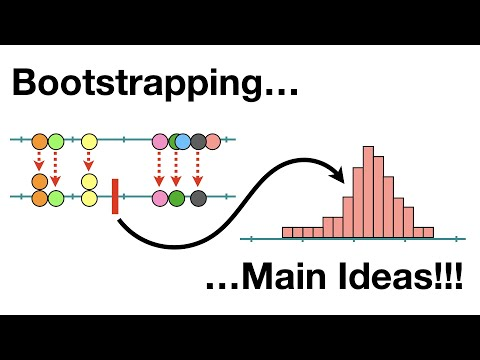

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Pre-Lecture HW

1.
The standard deviation of the original data shows how much individual data points vary from the mean, showing the overall spread within the dataset. In contrast, the standard error of the mean measures the variability in the sample mean, basically showing how much it would fluctuate if we repeatedly drew samples from the population. While standard deviation describes the spread of the data itself, standard error of the mean indicates the precision of our estimate of the population mean, with smaller values as the sample size increases

2.
To create a 95% confidence interval using the standard error of the mean, you first calculate the mean of your sample. Then, multiply the standard error of the mean by 1.96. Finally, subtract this value from the sample mean for the lower bound of the interval and add it to the sample mean of the upper bound. This range is the interval in which 95% of sample means would fall.

### Summary of Confidence Intervals and Sample Size

1. **95% Confidence Interval Using Standard Error of the Mean**:
   To calculate a 95% confidence interval, first determine the sample mean (\(\bar{x}\)) and the standard error of the mean (SEM), which is calculated by dividing the sample standard deviation by the square root of the sample size (\(n\)). The confidence interval is then given by:
   \[
   \left( \bar{x} - 1.96 \times \text{SEM}, \bar{x} + 1.96 \times \text{SEM} \right)
   \]
   The value 1.96 is the z-score that corresponds to a 95% confidence level in a standard normal distribution, which captures 95% of the possible sample means.

2. **Why 1.96?**:
   The z-score of 1.96 is used because, in a standard normal distribution, 95% of the data lies between -1.96 and +1.96 standard deviations from the mean. It represents the critical value that defines the range around the sample mean where we are 95% confident the population mean lies.

3. **Effect of Sample Size on Confidence Interval**:
   The sample size affects the width of the confidence interval because it influences the SEM. As the sample size increases, the SEM decreases, which results in a narrower (more precise) confidence interval. Conversely, smaller sample sizes lead to a larger SEM and a wider (less precise) confidence interval. This is because a larger sample provides more information, reducing uncertainty in estimating the population mean.

This summarizes how to calculate and interpret confidence intervals and explains the key role that sample size plays in determining the precision of the interval estimate.

https://chatgpt.com/share/66fa034c-6a38-800b-9f8c-ca6f7dbdcb27

3.
To create a 95% bootstrapped confidence interval using bootstrapped sample means, you need to generate many bootstrapped samples by repeatedly sampling with replacement from the original data and calculating the sampling mean each time. This gives you a distribution of bootstrapped sample means which is the variabulity of the mean.
Once you have this distribution, you can use np.quantile() function to find the lower and upper percentiles that correspond to the 2.5% and 97.5%. These values are the bounds of your confidence interval. Unlike the mean +-2 times the standard errpr method, this bootstrapped confidence interval captures exactly 95% of the bootstrapped means. 

4.

95% Bootstrap Confidence Interval: [47.28, 50.63]


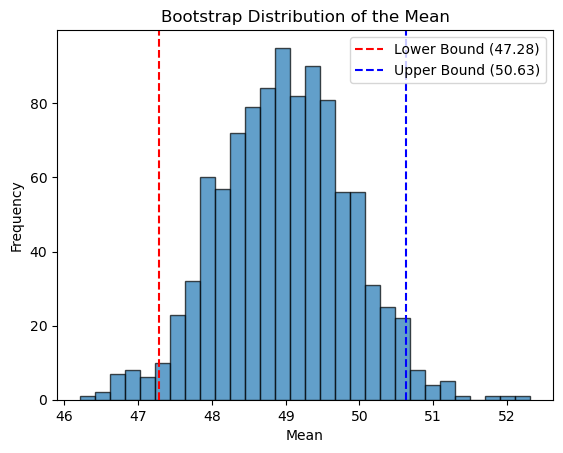

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a sample (replace this with your actual data)
np.random.seed(42)
sample_data = np.random.normal(loc=50, scale=10, size=100)

# Step 2: Define bootstrap function
def bootstrap_means(data, num_bootstrap=1000):
    bootstrap_means = np.empty(num_bootstrap)
    n = len(data)
    
    for i in range(num_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    
    return bootstrap_means

# Step 3: Compute bootstrap confidence interval
bootstrap_distribution = bootstrap_means(sample_data, num_bootstrap=1000)
lower_bound = np.percentile(bootstrap_distribution, 2.5)
upper_bound = np.percentile(bootstrap_distribution, 97.5)

print(f"95% Bootstrap Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Step 4: Plot bootstrap distribution (Optional)
plt.hist(bootstrap_distribution, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='blue', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Bootstrap Distribution of the Mean')
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


95% Bootstrap Confidence Interval for the Median: [46.95, 51.34]


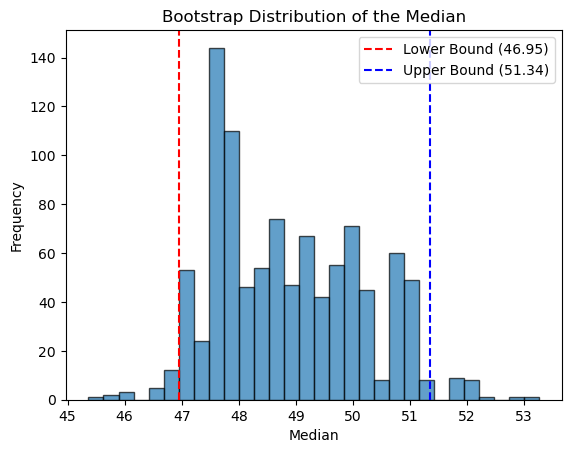

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a sample (replace this with your actual data)
np.random.seed(42)  # Set seed for reproducibility
sample_data = np.random.normal(loc=50, scale=10, size=100)  # Generate a random sample

# Step 2: Define bootstrap function for the median
def bootstrap_medians(data, num_bootstrap=1000):
    """
    Performs bootstrap resampling and computes the medians for each resample.

    Parameters:
        data (array-like): Original sample data.
        num_bootstrap (int): Number of bootstrap resamples to take.

    Returns:
        bootstrap_medians (np.array): Array of medians from each bootstrap sample.
    """
    bootstrap_medians = np.empty(num_bootstrap)  # Empty array to store medians
    n = len(data)  # Sample size
    
    for i in range(num_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)  # Resample with replacement
        bootstrap_medians[i] = np.median(bootstrap_sample)  # Calculate median of the resample
    
    return bootstrap_medians

# Step 3: Compute bootstrap confidence interval for the median
bootstrap_distribution = bootstrap_medians(sample_data, num_bootstrap=1000)
lower_bound = np.percentile(bootstrap_distribution, 2.5)
upper_bound = np.percentile(bootstrap_distribution, 97.5)

print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Step 4: Plot bootstrap distribution (Optional)
plt.hist(bootstrap_distribution, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='blue', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Bootstrap Distribution of the Median')
plt.xlabel('Median')
plt.ylabel('Frequency')
plt.legend()
plt.show()


To change the code to produce a 95% bootstrap confidence interval for different population parameter for example the population median, the statistic calculated within the bootstrap loop is changed from np.mean() to np.median().

Certainly! Here’s a summary of our discussion:

---

### Summary of Discussion on Bootstrapping and Confidence Intervals

1. **Bootstrapping Overview**:
   - Bootstrapping is a statistical method that allows us to estimate the sampling distribution of a statistic (such as the mean or median) by resampling with replacement from the observed data.
   - It is particularly useful when the underlying distribution of the population is unknown or does not meet the assumptions of parametric methods.

2. **Creating a Bootstrap Confidence Interval**:
   - We discussed how to compute a 95% bootstrap confidence interval for both the mean and median using Python.
   - The key steps involved generating a sample, defining a function to perform bootstrap resampling, calculating the bootstrap distribution of the statistic, and using percentiles to create the confidence interval.

3. **Effectiveness of Bootstrapping**:
   - Bootstrapping is effective because:
     - It is a **distribution-free method**, requiring no assumptions about the population's distribution.
     - It can be applied to any statistic, including those without a known sampling distribution, making it versatile for various applications.
     - It is robust to small sample sizes, skewed distributions, and the presence of outliers.
     - It captures the inherent variability in the data, reflecting real-world conditions.

4. **Error Encountered**:
   - You encountered a `NameError` indicating that the function `bootstrap_medians` was not defined when attempting to compute the bootstrap confidence interval for the median.
   - We provided a complete code example that included the function definition and ensured that all components were correctly implemented to avoid such errors.

5. **Code Implementation**:
   - The final provided code calculates a 95% bootstrap confidence interval for the median of a generated sample and includes optional visualization of the bootstrap distribution.

---

This summary captures the main points of our conversation, including the concept of bootstrapping, its application for confidence intervals, and the resolution of the error you encountered. If you need any adjustments or additional details, let me know!

https://chatgpt.com/share/66fa0c16-61b0-800b-ae24-1a67cec24958

Post-Lecture HW

5.
In statistics, distinguishing between a population parameter and a sample statistic is important for understanding confidence intervals. A population parameter is an actual value that describes an entire population. In contrast, a sample statistic is calculated from a subset of the population and can vary from sample to sample.
Confidence intervals use sample statistics to estimate population parametrs by providing a range of values that probably contains the parameter, also with a specific level of confidence. 

Certainly! Here's a summary of our discussion regarding population parameters, sample statistics, and their application in the context of confidence intervals:

---

### Summary of Population Parameters and Sample Statistics

1. **Definitions**:
   - **Population Parameter**: A numerical value summarizing a characteristic of an entire population (e.g., population mean \( \mu \), population proportion \( p \)). It is often unknown due to the impracticality of collecting data from every individual in the population.
   - **Sample Statistic**: A numerical value summarizing a characteristic of a sample, which is a subset of the population (e.g., sample mean \( \bar{x} \), sample proportion \( \hat{p} \)). Sample statistics can vary across different samples.

2. **Confidence Intervals**:
   - Confidence intervals use sample statistics to estimate population parameters, providing a range of values likely to contain the population parameter, along with a specified level of confidence (e.g., 95% confidence). 
   - A confidence interval is calculated using the formula:
     \[
     \text{Confidence Interval} = \text{Sample Statistic} \pm \text{Margin of Error}
     \]

3. **Real-World Examples**:
   - **Average Income**: The true average income of all working adults in a country is a population parameter, while the average income found from a survey of 1,000 adults is a sample statistic.
   - **Customer Satisfaction**: The overall satisfaction rating for a product is the population parameter, and the average rating from a sample of 200 customers is the sample statistic.
   - **Height of Students**: The average height of all high school students in a state is a population parameter, while the average height calculated from a sample of 150 students is a sample statistic.
   - **Election Polling**: The true proportion of voters supporting a candidate is the population parameter, and the proportion found from a poll of 500 voters is the sample statistic.
   - **Medical Study**: The average cholesterol level of all adults in a city is a population parameter, with the average level measured from a sample of 300 adults serving as the sample statistic.

---

This summary captures the key points of our discussion, including definitions, the role of confidence intervals, and practical examples to illustrate the concepts. If you need any more details or modifications, feel free to ask!

https://chatgpt.com/share/66fa1110-4aa8-800b-b179-a47ff5591218

6.
### What is the process of bootstrapping?
Imagine you're a fan of a popular TV series, and you want to guess how many episodes people have watched on average. Instead of asking everyone, you just ask your 10 friends. To use bootstrapping, you would randomly pick from those 10 friends, letting some be picked more than once, to create new mini groups. You do this many times each time calculating the average number of episodes watched in those mini groups. By doing this, you can create a distribution of average episode views, helping you understand the viewing habits of the entire fan base based on your small sample.
### What is the main purpose of bootstrapping?
Let’s say you’re a chef experimenting with a new recipe. You want to know how much people enjoy your dish, but you can only serve it to a few friends. By using bootstrapping, you can create several taste tests by randomly choosing different combinations of friends who tried the dish and asking them to rate it. The main purpose of bootstrapping here is to estimate how popular your recipe might be with a larger audience, even if you only have a small group of tasters. It allows you to understand the variability of ratings and helps you figure out if your dish is likely to be a hit.
### If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
Imagine you’re an environmentalist and you believe that the average temperature in a national park is around 28 degrees celcius during summer. You collect temperature readings from 20 different days in July. To check your guess using bootstrapping, you take those 20 temperature readings and create many new samples by randomly picking days. After doing this a thousand times, you compute the average temperature for each sample. If most of these average temperatures are close to 28 degrees celcius, it supports your initial guess. But if the majority are significantly higher or lower, it suggests your estimate might not be accurate, suggesting you to rethink your understanding of the temperature in the park.

7.
When a confidence interval overlaps zero, it suggests that the true effect of the drug might not be significantly different from zero. This means that while your sample mean may indicate a certain effect, the natural variability in your data allows for the possibility that the actual average effect could be zero. In such cases, you fail to reject the null hypothesis, which assumes there is no average effect. Essentially, you can’t be confident enough to say the drug does anything meaningful. If the confidence interval does not include zero, you have stronger evidence to reject the null hypothesis. This indicates that your sample mean is significantly different from zero, suggesting that the drug does have a real effect on average. In this scenario you can confidently support the alternative hypothesis, basically saying that the drug is indeed having a genuine impact.

8.
The aim of this analysis is to evaluate the effectiveness of a new vaccine developed by AliTech by comparing the initial health scores of patients with their final health scores after vaccination. This comparison will help us understand if the vaccine has had a significant positive impact on health outcomes.
In this context, the null hypothesis represents that there is no effect of the vaccine on the health scores of patients. We will test this hypothesis using statistical methods, specifically bootstrapping.
To visualize the data, I will create box plots to compare the initial anf final health scores. This will help show any differences in score before and after vaccination.

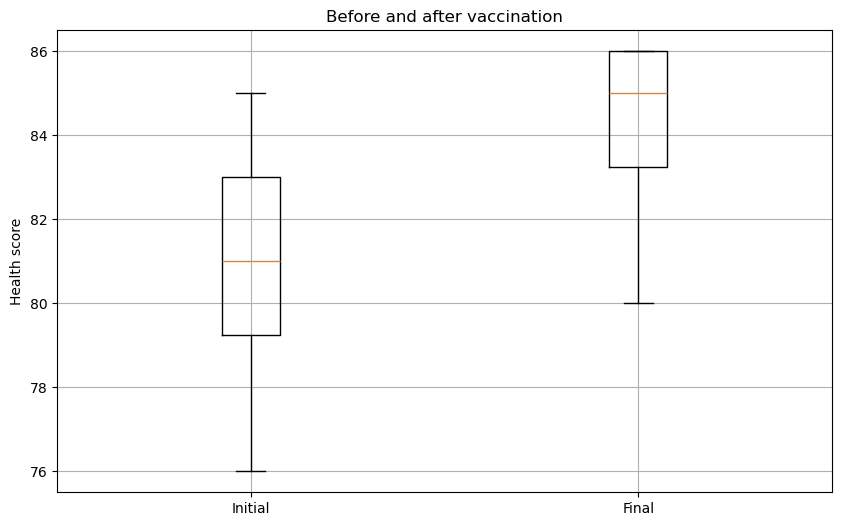

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('Book2.csv')
plt.figure(figsize=(10,6))
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial', 'Final'])
plt.title('Before and after vaccination')
plt.ylabel('Health score')
plt.grid(True)
plt.show()


I will now analyze the differences in health scores using bootstrapping. I will calculate the differences between the final and initial health scores, generate bootstrap samples, and calculate the mean difference for each sample. Then I will construct a confidence interval for the mean difference.

In [10]:
import numpy as np
data['Difference'] = data['FinalHealthScore'] - data['InitialHealthScore']
np.random.seed(42)
n_iterations = 1000
bootstrap_means = []
for _ in range(n_iterations):
    sample = np.random.choice(data['Difference'], size=len(data), replace=True)
    bootstrap_means.append(np.mean(sample))
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
print(f'Mean difference confidence interval: [{lower_bound:.2f}, {upper_bound:.2f}]')

Mean difference confidence interval: [0.70, 5.50]


I can also visualize the distribution of bootstrap means using a histogram.

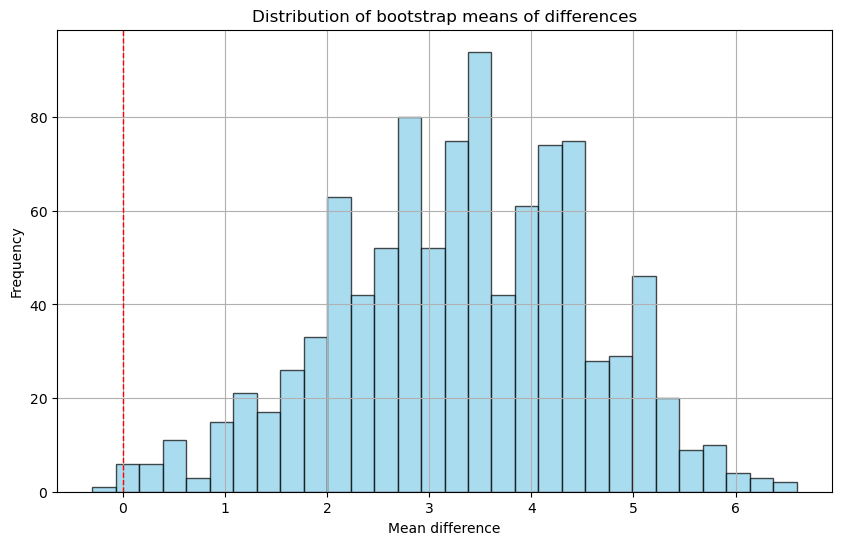

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of bootstrap means of differences')
plt.xlabel('Mean difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Since the calculated mean difference confidence interval does not include zero, I can reject the null hypothesis and conclude that the vaccince has a statistically significant effect on improving health scores. This means I have enough evidence to claim that the vaccine is effective.

9.
Yes